# Chapter 13 — Monte Carlo Simulation (HR Context)
This Colab notebook reproduces the chapter’s examples

**Source:** *الفصل الثالث عشر - محاكاة مونت كارلو* (PDF).

## 0) Setup
We install small helper libraries to render Arabic labels correctly in Matplotlib. If you do not need Arabic text on charts, you may skip the reshaping/bidi part.

In [1]:
# --- Colab: install Arabic text rendering helpers (safe to re-run) ---
!pip -q install arabic-reshaper python-bidi

import numpy as np
import matplotlib.pyplot as plt

import arabic_reshaper
from bidi.algorithm import get_display

def ar(text: str) -> str:
    """Return a Matplotlib-friendly Arabic string (reshaped + bidi)."""
    return get_display(arabic_reshaper.reshape(text))

# Optional: set a default font that typically supports Arabic on Colab.
# If labels appear as boxes, try another font available in your runtime.
plt.rcParams["font.family"] = "DejaVu Sans"


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 10.0 MB/s eta 0:00:00


## 1) Simulating Job Satisfaction with a Normal Distribution
We generate satisfaction scores for 1000 employees using a Normal distribution with mean 70 and standard deviation 10, then plot a histogram.

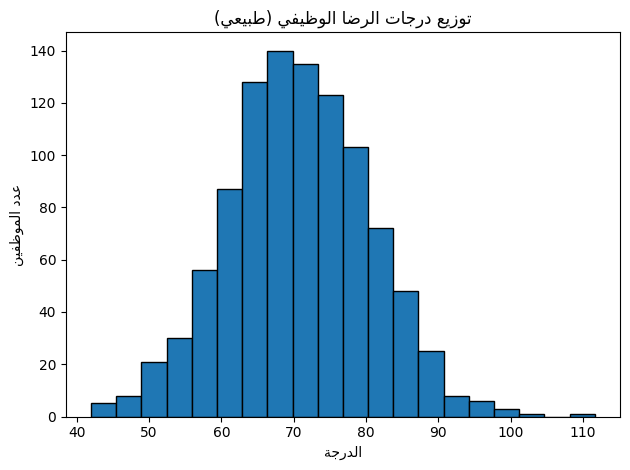

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 satisfaction scores: mean=70, std=10
satisfaction_scores = np.random.normal(loc=70, scale=10, size=1000)

plt.figure()
plt.hist(satisfaction_scores, bins=20, edgecolor="black")
plt.title(ar("توزيع درجات الرضا الوظيفي (طبيعي)"))
plt.xlabel(ar("الدرجة"))
plt.ylabel(ar("عدد الموظفين"))
plt.tight_layout()
plt.show()


### 1.1) Percentage of Low-Satisfaction Employees (< 60)
Compute the proportion of employees whose satisfaction is below 60.

In [3]:
low_satisfaction_count = np.sum(satisfaction_scores < 60)
low_satisfaction_percentage = low_satisfaction_count / len(satisfaction_scores) * 100

print(f"نسبة الموظفين منخفضي الرضا (أقل من 60): {low_satisfaction_percentage:.2f}%")


نسبة الموظفين منخفضي الرضا (أقل من 60): 13.60%


### 1.2) Re-run to Notice Variability
Because the simulation is stochastic, repeating it changes the histogram and the percentage. Here is a small helper function to re-run quickly.

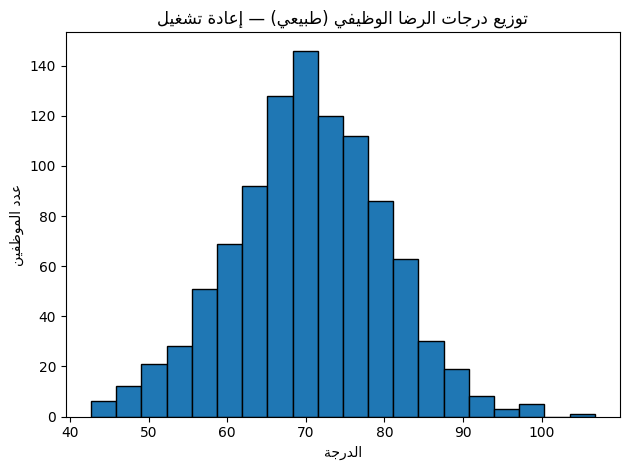

نسبة الموظفين منخفضي الرضا (أقل من 60): 15.10%


In [4]:
def run_once_normal_satisfaction(n=1000, mean=70, std=10, threshold=60):
    scores = np.random.normal(loc=mean, scale=std, size=n)
    pct_low = np.mean(scores < threshold) * 100

    plt.figure()
    plt.hist(scores, bins=20, edgecolor="black")
    plt.title(ar("توزيع درجات الرضا الوظيفي (طبيعي) — إعادة تشغيل"))
    plt.xlabel(ar("الدرجة"))
    plt.ylabel(ar("عدد الموظفين"))
    plt.tight_layout()
    plt.show()

    print(f"نسبة الموظفين منخفضي الرضا (أقل من {threshold}): {pct_low:.2f}%")
    return pct_low

# Run once (you can run this cell multiple times)
_ = run_once_normal_satisfaction()


## 2) One-Trial Simulation: Employee Leavers (Binomial)
A single draw for the number of leavers among 100 employees, with leave probability 0.10.

In [5]:
leavers = np.random.binomial(n=100, p=0.1, size=1)[0]
print(f"عدد الموظفين الذين غادروا في هذه التجربة: {leavers}")


عدد الموظفين الذين غادروا في هذه التجربة: 7


## 3) One-Trial Simulation: New Hires (Poisson)
A single draw for the number of new hires in a week, with average (λ) = 3.

In [6]:
new_hires = np.random.poisson(lam=3, size=1)[0]
print(f"عدد الموظفين الجدد في هذه التجربة: {new_hires}")


عدد الموظفين الجدد في هذه التجربة: 3


## 4) One-Trial Simulation: Hiring Duration (Triangular)
Hiring days with min=10, mode=15, max=30.

In [7]:
hiring_days = np.random.triangular(left=10, mode=15, right=30, size=1)[0]
print(f"مدة التوظيف في هذه التجربة: {hiring_days:.2f} يومًا")


مدة التوظيف في هذه التجربة: 22.97 يومًا


## 5) One-Trial Simulation: Random Employee Selection (Uniform / randint)
Select one employee uniformly from 1 to 50 (inclusive).

In [8]:
selected_employee = np.random.randint(1, 51)  # 51 to include 50
print(f"الموظف المختار للتدريب هو رقم: {selected_employee}")


الموظف المختار للتدريب هو رقم: 9


## 6) One-Trial Simulation: Tenure Until Leaving (Exponential)
Time until leaving (in months) with mean = 5 months (scale=5).

In [9]:
tenure_months = np.random.exponential(scale=5, size=1)[0]
print(f"المدة حتى مغادرة الموظف: {tenure_months:.2f} أشهر")


المدة حتى مغادرة الموظف: 2.61 أشهر


## 7) One-Trial Simulation: Performance Score (Logistic)
A single logistic draw with mean 70 and scale 10.

In [10]:
performance_score = np.random.logistic(loc=70, scale=10, size=1)[0]
print(f"درجة الأداء في هذه التجربة: {performance_score:.2f}")


درجة الأداء في هذه التجربة: 121.10


## 8) A Simple “Manual” Monte Carlo Example — Implemented in Python
We replicate the idea from the chapter: 10 employees, probability of leaving = 0.20, and we repeat the month-simulation multiple times to summarize outcomes.

In [11]:
def simulate_month_leavers(n_employees=10, p_leave=0.20):
    # Bernoulli trials: True means leave
    leaves = (np.random.rand(n_employees) <= p_leave)
    return leaves.sum()

# Run a few trials (like the explanatory 5 runs in the chapter)
trials = 5
results = [simulate_month_leavers() for _ in range(trials)]

print("نتائج التجارب:", results)
print(f"متوسط عدد المغادرين: {np.mean(results):.2f}")
print(f"الحد الأدنى: {np.min(results)}")
print(f"الحد الأقصى: {np.max(results)}")
print(f"احتمال مغادرة أكثر من 3 موظفين (ضمن {trials} تجارب فقط): {np.mean(np.array(results) > 3) * 100:.1f}%")


نتائج التجارب: [np.int64(1), np.int64(0), np.int64(3), np.int64(3), np.int64(4)]
متوسط عدد المغادرين: 2.20
الحد الأدنى: 0
الحد الأقصى: 4
احتمال مغادرة أكثر من 3 موظفين (ضمن 5 تجارب فقط): 20.0%


## 9) Monte Carlo (Normal): Estimate Low-Satisfaction Percentage
We repeat the satisfaction generation at scale: 1000 simulations × 1000 employees each.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

n_simulations = 1000
sample_size = 1000
threshold = 60

all_scores = np.random.normal(loc=70, scale=10, size=n_simulations * sample_size)
low_percentage = np.mean(all_scores < threshold) * 100

print(f"نسبة الموظفين منخفضي الرضا (أقل من {threshold}): {low_percentage:.2f}%")


نسبة الموظفين منخفضي الرضا (أقل من 60): 15.83%


### 9.1) Visualize Distribution and Highlight Low Scores
A stacked histogram showing employees below the threshold vs. the rest, using **percent** on the y-axis.

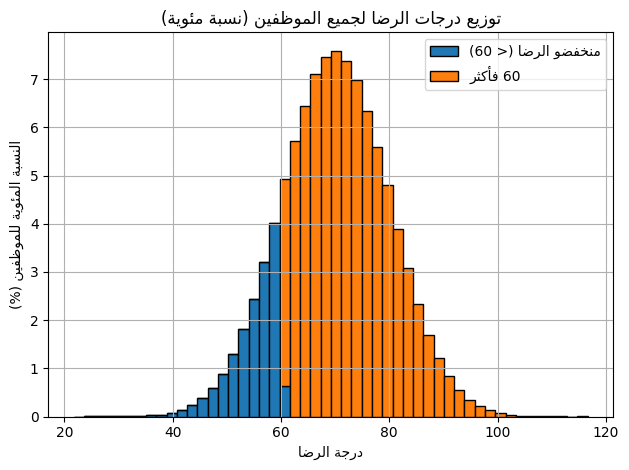

In [13]:
low_scores = all_scores[all_scores < threshold]
high_scores = all_scores[all_scores >= threshold]

total = len(all_scores)
low_weights = (np.ones_like(low_scores) / total) * 100
high_weights = (np.ones_like(high_scores) / total) * 100

plt.figure()
plt.hist([low_scores, high_scores], bins=50, stacked=True,
         weights=[low_weights, high_weights],
         edgecolor="black",
         label=[ar("منخفضو الرضا (< 60)"), ar("60 فأكثر")])
plt.title(ar("توزيع درجات الرضا لجميع الموظفين (نسبة مئوية)"))
plt.xlabel(ar("درجة الرضا"))
plt.ylabel(ar("النسبة المئوية للموظفين (%)"))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 10) Promotion Effect on Satisfaction (Shift by +8)
Compare satisfaction distributions *before* vs. *after* promotion by shifting scores +8 points.

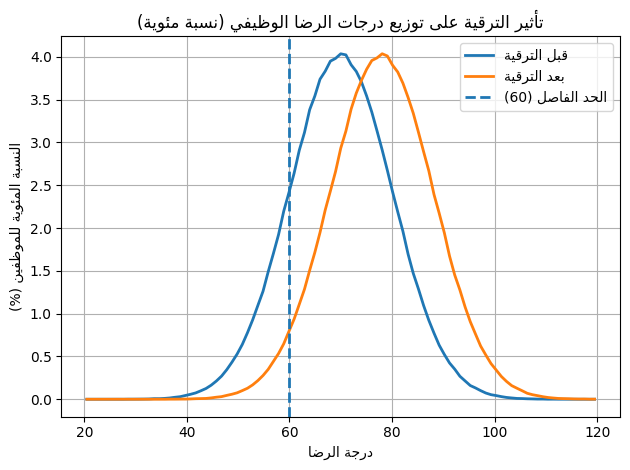

نسبة الموظفين منخفضي الرضا قبل الترقية: 15.90%
نسبة الموظفين منخفضي الرضا بعد الترقية: 3.61%


In [14]:
n_simulations = 1000
sample_size = 1000
threshold = 60

before_all = np.random.normal(loc=70, scale=10, size=n_simulations * sample_size)
after_all = before_all + 8

bins = np.linspace(20, 120, 100)
before_counts, _ = np.histogram(before_all, bins=bins)
after_counts, _ = np.histogram(after_all, bins=bins)

total = len(before_all)
before_percent = (before_counts / total) * 100
after_percent = (after_counts / total) * 100
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.figure()
plt.plot(bin_centers, before_percent, label=ar("قبل الترقية"), linewidth=2)
plt.plot(bin_centers, after_percent, label=ar("بعد الترقية"), linewidth=2)
plt.axvline(threshold, linestyle="--", linewidth=2, label=ar("الحد الفاصل (60)"))

plt.title(ar("تأثير الترقية على توزيع درجات الرضا الوظيفي (نسبة مئوية)"))
plt.xlabel(ar("درجة الرضا"))
plt.ylabel(ar("النسبة المئوية للموظفين (%)"))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

before_low_pct = np.mean(before_all < threshold) * 100
after_low_pct = np.mean(after_all < threshold) * 100
print(f"نسبة الموظفين منخفضي الرضا قبل الترقية: {before_low_pct:.2f}%")
print(f"نسبة الموظفين منخفضي الرضا بعد الترقية: {after_low_pct:.2f}%")


## 11) Monte Carlo (Binomial): Monthly Leavers and Critical Scenarios
Simulate monthly leavers for 100 employees (p=0.1) across 1000 months, and highlight the critical zone (>15 leavers).

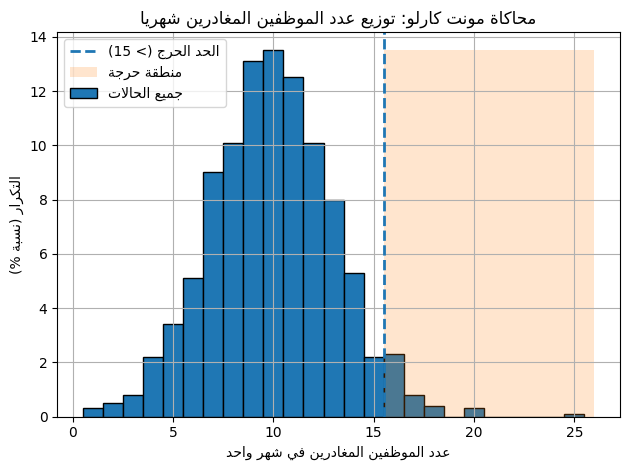

متوسط عدد المغادرين شهريًا: 9.93 موظف
الانحراف المعياري لعدد المغادرين: 3.07
العدد الأقصى للمغادرين في شهر واحد: 25 موظف
احتمال مغادرة أكثر من 15 موظفًا دفعة واحدة: 3.90%


In [15]:
import numpy as np
import matplotlib.pyplot as plt

n_simulations = 1000
n_employees = 100
p_leave = 0.1
critical_threshold = 15

leaver_counts = np.random.binomial(n=n_employees, p=p_leave, size=n_simulations)

bins = np.arange(leaver_counts.min(), leaver_counts.max() + 2) - 0.5
counts, _ = np.histogram(leaver_counts, bins=bins)
percentages = (counts / n_simulations) * 100
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.figure()
plt.bar(bin_centers, percentages, width=1, edgecolor="black", label=ar("جميع الحالات"))
plt.axvline(critical_threshold + 0.5, linestyle="--", linewidth=2, label=ar("الحد الحرج (> 15)"))
plt.fill_betweenx(
    y=[0, max(percentages)],
    x1=critical_threshold + 0.5,
    x2=leaver_counts.max() + 1,
    alpha=0.2,
    label=ar("منطقة حرجة")
)

plt.title(ar("محاكاة مونت كارلو: توزيع عدد الموظفين المغادرين شهريًا"))
plt.xlabel(ar("عدد الموظفين المغادرين في شهر واحد"))
plt.ylabel(ar("التكرار (نسبة %)"))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

mean_leavers = np.mean(leaver_counts)
std_leavers = np.std(leaver_counts)
max_leavers = np.max(leaver_counts)
prob_critical = np.mean(leaver_counts > critical_threshold) * 100

print(f"متوسط عدد المغادرين شهريًا: {mean_leavers:.2f} موظف")
print(f"الانحراف المعياري لعدد المغادرين: {std_leavers:.2f}")
print(f"العدد الأقصى للمغادرين في شهر واحد: {max_leavers} موظف")
print(f"احتمال مغادرة أكثر من {critical_threshold} موظفًا دفعة واحدة: {prob_critical:.2f}%")


## 12) Monte Carlo (Logistic): Performance Distribution and Categories
Generate 1000 performance scores using the logistic distribution, then compute category percentages (<60 low, 60–85 mid, >85 high) and plot a histogram in percent.

نسبة منخفضي الأداء (< 60): 28.20%
نسبة الأداء المتوسط (60–85): 53.50%
نسبة مرتفعي الأداء (> 85): 18.30%


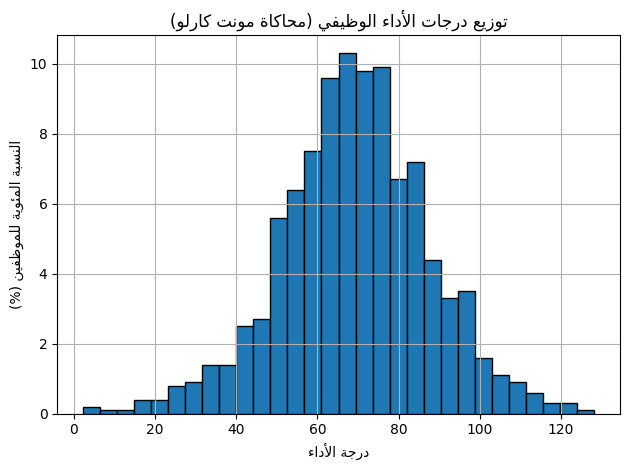

In [16]:
import numpy as np
import matplotlib.pyplot as plt

n_simulations = 1000
loc = 70
scale = 10

performance_scores = np.random.logistic(loc=loc, scale=scale, size=n_simulations)

low_threshold = 60
high_threshold = 85

low_pct = np.mean(performance_scores < low_threshold) * 100
high_pct = np.mean(performance_scores > high_threshold) * 100
mid_pct = 100 - low_pct - high_pct

print(f"نسبة منخفضي الأداء (< 60): {low_pct:.2f}%")
print(f"نسبة الأداء المتوسط (60–85): {mid_pct:.2f}%")
print(f"نسبة مرتفعي الأداء (> 85): {high_pct:.2f}%")

counts, bin_edges = np.histogram(performance_scores, bins=30)
percentages = (counts / n_simulations) * 100
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

plt.figure()
plt.bar(bin_centers, percentages, width=(bin_edges[1] - bin_edges[0]), edgecolor="black")
plt.title(ar("توزيع درجات الأداء الوظيفي (محاكاة مونت كارلو)"))
plt.xlabel(ar("درجة الأداء"))
plt.ylabel(ar("النسبة المئوية للموظفين (%)"))
plt.grid(True)
plt.tight_layout()
plt.show()


### 12.1) Make Scores Realistic: Clip to [0, 100]
The chapter notes that the logistic distribution can generate unrealistic values >100; here we clip scores and re-plot.

متوسط درجة الأداء: 69.91
الانحراف المعياري: 17.00
عدد منخفضي الأداء (< 60): 251 موظف (25.1%)
عدد الأداء المتوسط (60–85): 559 موظف (55.9%)
عدد مرتفعي الأداء (> 85): 190 موظف (19.0%)


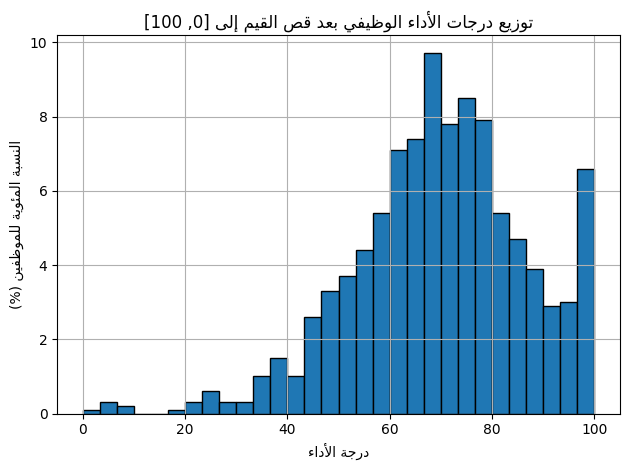

In [17]:
performance_scores_clipped = np.clip(
    np.random.logistic(loc=loc, scale=scale, size=n_simulations),
    0,
    100
)

low_pct = np.mean(performance_scores_clipped < low_threshold) * 100
high_pct = np.mean(performance_scores_clipped > high_threshold) * 100
mid_pct = 100 - low_pct - high_pct

mean_score = np.mean(performance_scores_clipped)
std_score = np.std(performance_scores_clipped)

print(f"متوسط درجة الأداء: {mean_score:.2f}")
print(f"الانحراف المعياري: {std_score:.2f}")
print(f"عدد منخفضي الأداء (< 60): {np.sum(performance_scores_clipped < low_threshold)} موظف ({low_pct:.1f}%)")
print(f"عدد الأداء المتوسط (60–85): {np.sum((performance_scores_clipped >= low_threshold) & (performance_scores_clipped <= high_threshold))} موظف ({mid_pct:.1f}%)")
print(f"عدد مرتفعي الأداء (> 85): {np.sum(performance_scores_clipped > high_threshold)} موظف ({high_pct:.1f}%)")

counts, bin_edges = np.histogram(performance_scores_clipped, bins=30)
percentages = (counts / n_simulations) * 100
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

plt.figure()
plt.bar(bin_centers, percentages, width=(bin_edges[1] - bin_edges[0]), edgecolor="black")
plt.title(ar("توزيع درجات الأداء الوظيفي بعد قص القيم إلى [0, 100]"))
plt.xlabel(ar("درجة الأداء"))
plt.ylabel(ar("النسبة المئوية للموظفين (%)"))
plt.grid(True)
plt.tight_layout()
plt.show()
